<a href="https://colab.research.google.com/github/Ramotso/Convolutional-Neural-Network/blob/main/ASS_3_Attempts_Object_detection_(experiments).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches # For bounding boxes

from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15, 15)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Aircraft/archive_2.zip -d /content/military-aircraft-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3416.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3417.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3418.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3419.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/342.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3420.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3421.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/3422.xml  
  inflating: /content/military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxe

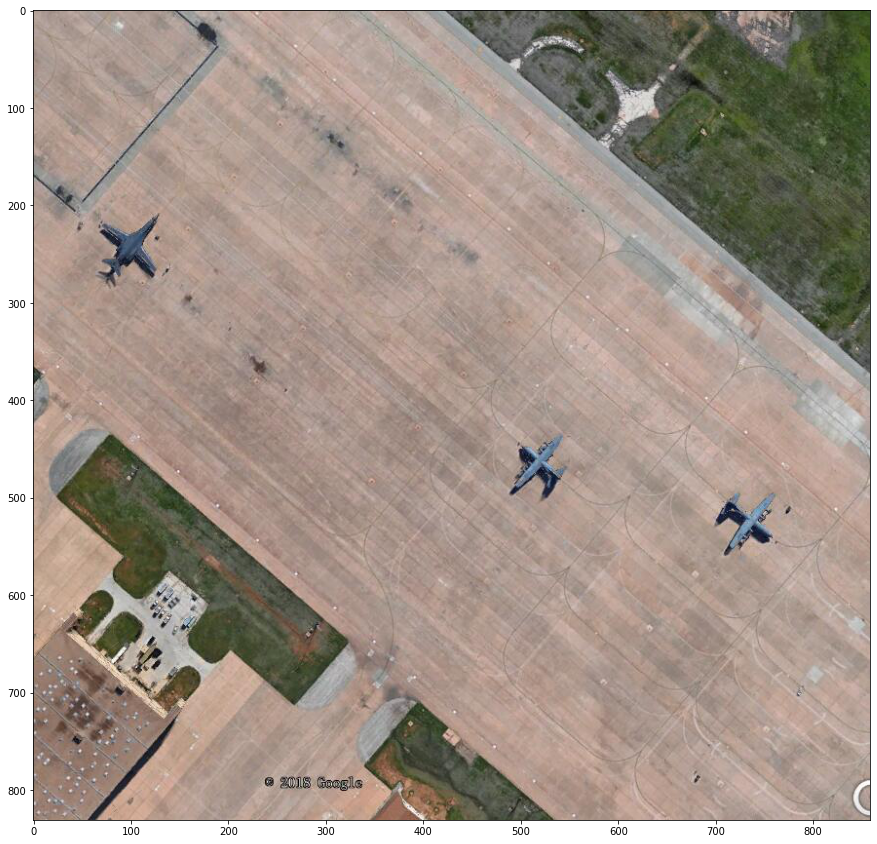

In [ ]:


# Show image
image_name = "/content/military-aircraft-recognition-dataset/JPEGImages/1.jpg"

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()



In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

images_dir = '/content/military-aircraft-recognition-dataset/JPEGImages'
annotations_dir = '/content/military-aircraft-recognition-dataset/Annotations/'

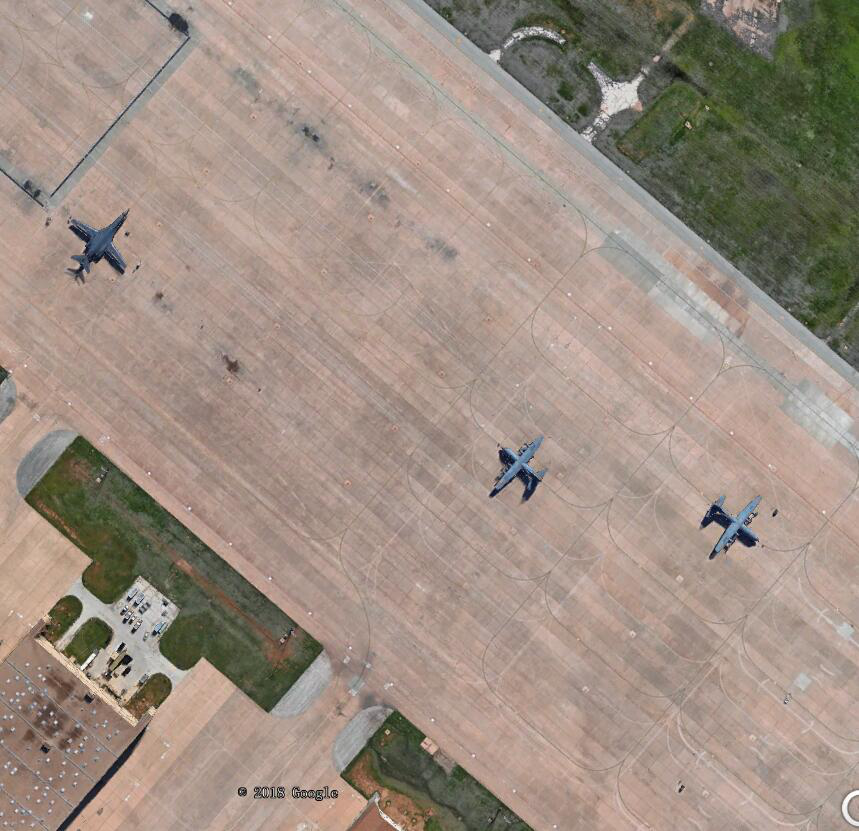

In [ ]:
sample_image = Image.open('/content/military-aircraft-recognition-dataset/JPEGImages/1.jpg')

sample_image

In [ ]:
with open('/content/military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/1.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<annotation>
	<filename>1.xml</filename>
	<source>
		<database>MAR20</database>
	</source>
	<size>
		<width>859</width>
		<height>831</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>A2</name>
		<bndbox>
			<xmin>485</xmin>
			<ymin>427</ymin>
			<xmax>554</xmax>
			<ymax>500</ymax>
		</bndbox>
	</object>
	<object>
		<name>A2</name>
		<bndbox>
			<xmin>694</xmin>
			<ymin>487</ymin>
			<xmax>770</xmax>
			<ymax>562</ymax>
		</bndbox>
	</object>
	<object>
		<name>A10</name>
		<bndbox>
			<xmin>58</xmin>
			<ymin>205</ymin>
			<xmax>134</xmax>
			<ymax>285</ymax>
		</bndbox>
	</object>
</annotation>


In [ ]:
tree = ET.parse('/content/military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/1.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)

for neighbor in root.iter('object'):
    label = (neighbor.find('name').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)

[[58, 205, 134, 285], [58, 205, 134, 285], [58, 205, 134, 285]]


[58, 205, 134, 285]
[58, 205, 134, 285]
[58, 205, 134, 285]


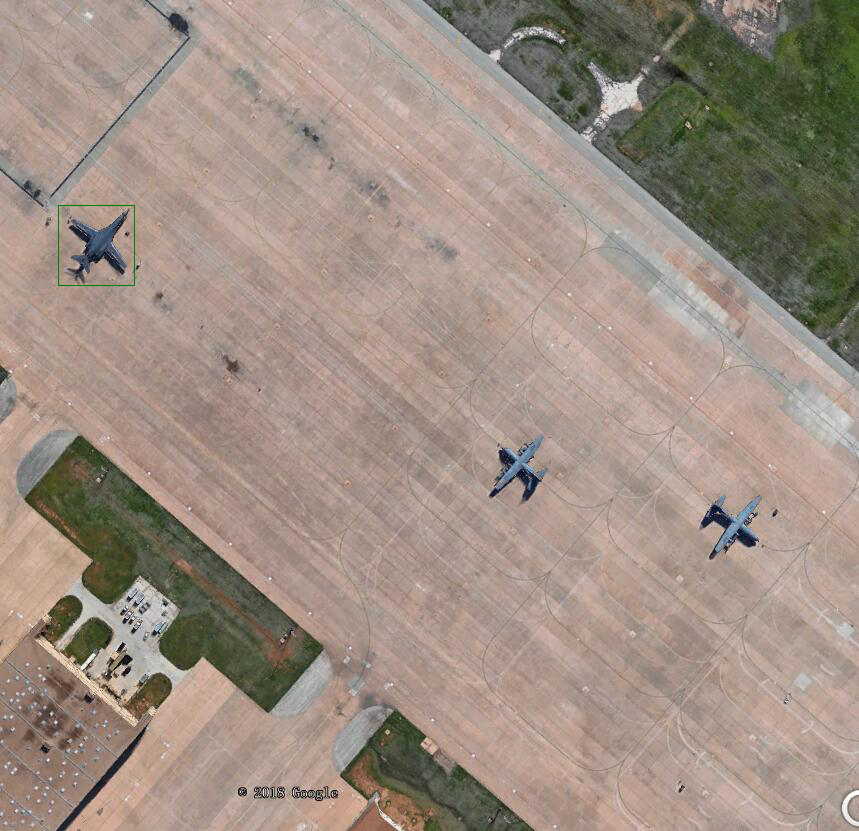

In [ ]:
sample_image_annotated = sample_image.copy()

img_bbox = ImageDraw.Draw(sample_image_annotated)

for bbox in sample_annotations:
    print(bbox)
    img_bbox.rectangle(bbox, outline="green") 
    
sample_image_annotated

In [ ]:
image_ids_annotations = defaultdict(list)

# Load annotations
path = '/content/military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/1.xml'
file = open(path)
anns = json.load(file)

# Add into datastructure
for ann in anns['annotations']:
    image_id = ann['image_id'] # Are integers
    image_ids_annotations[image_id].append(ann)



JSONDecodeError: ignored

In [ ]:
import xml.etree.ElementTree as ET
import glob
import os
import json

In [ ]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]
    
def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

In [ ]:
classes = []
input_dir = "annotations/"
output_dir = "labels/"
image_dir = "images/"
os.mkdir(output_dir)

In [ ]:
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

In [ ]:
files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.jpg")):
        print(f"{filename} image does not exist!")
        continue

In [ ]:
import pandas as pd
import numpy as np
import xml.etree.cElementTree as et

In [ ]:
tree=et.parse('/content/military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/1.xml')
root=tree.getroot()

In [ ]:
name = []
xmin = []
ymin = []
xmax = []
ymax = []


In [ ]:
import tensorflow as tf
assert tf.__version__>= "0.20"

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils

from tensorflow.keras import layers

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import cv2

In [ ]:
dir_anno = "/content/military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes"
img_dir  = "/content/military-aircraft-recognition-dataset/JPEGImages"

In [ ]:
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])

print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
df_anno.head()

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: bbx_1_name
  9: bbx_1_xmin
 10: bbx_1_ymin
 11: bbx_1_xmax
 12: bbx_1_ymax
 13: bbx_2_name
 14: bbx_2_xmin
 15: bbx_2_ymin
 16: bbx_2_xmax
 17: bbx_2_ymax
 18: Nobj
 19: fileID
 20: bbx_3_name
 21: bbx_3_xmin
 22: bbx_3_ymin
 23: bbx_3_xmax
 24: bbx_3_ymax
 25: bbx_4_name
 26: bbx_4_xmin
 27: bbx_4_ymin
 28: bbx_4_xmax
 29: bbx_4_ymax
 30: bbx_5_name
 31: bbx_5_xmin
 32: bbx_5_ymin
 33: bbx_5_xmax
 34: bbx_5_ymax
 35: bbx_6_name
 36: bbx_6_xmin
 37: bbx_6_ymin
 38: bbx_6_xmax
 39: bbx_6_ymax
 40: bbx_7_name
 41: bbx_7_xmin
 42: bbx_7_ymin
 43: bbx_7_xmax
 44: bbx_7_ymax
 45: bbx_8_name
 46: bbx_8_xmin
 47: bbx_8_ymin
 48: bbx_8_xmax
 49: bbx_8_ymax
 50: bbx_9_name
 51: bbx_9_xmin
 52: bbx_9_ymin
 53: bbx_9_xmax
 54: bbx_9_ymax
 55: bbx_10_name
 56: bbx_10_xmin
 57: bbx_10_ymin
 58: bbx_10_xmax
 59: bbx_10_ymax
 60: bbx_11_name
 61: 

width  height  depth bbx_0_name  bbx_0_xmin  bbx_0_ymin  bbx_0_xmax  \
0    800     800      3        A14       468.0        98.0       585.0   
1    800     800      3         A2        86.0       120.0       308.0   
2    800     800      3         A1       218.0       133.0       293.0   
3    800     800      3         A5        12.0        83.0       128.0   
4    800     800      3        A16       508.0        13.0       663.0   

   bbx_0_ymax bbx_1_name  bbx_1_xmin  ...  bbx_48_name  bbx_48_xmin  \
0       209.0        A14       241.0  ...          NaN          NaN   
1       427.0         A2        94.0  ...          NaN          NaN   
2       239.0         A1       134.0  ...          NaN          NaN   
3       249.0         A5       145.0  ...          NaN          NaN   
4       124.0        A16       507.0  ...          NaN          NaN   

   bbx_48_ymin bbx_48_xmax  bbx_48_ymax  bbx_49_name  bbx_49_xmin  \
0          NaN         NaN          NaN          NaN          NaN   
1          NaN         NaN          NaN          NaN          NaN   
2          NaN         NaN          NaN          NaN          NaN   
3          NaN         NaN          NaN          NaN          NaN   
4          NaN         NaN          NaN          NaN          NaN   

   bbx_49_ymin  bbx_49_xmax bbx_49_ymax  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN  

[5 rows x 255 columns]

In [ ]:
dir_preprocessed = "/content/military-aircraft-recognition-dataset"
df_anno.to_csv(os.path.join(dir_preprocessed,"df_anno.csv"),index=False)

Counter({'A16': 2632, 'A14': 1778, 'A2': 1729, 'A13': 1652, 'A1': 1646, 'A17': 1397, 'A5': 1262, 'A19': 1236, 'A3': 1176, 'A9': 1086, 'A20': 981, 'A8': 944, 'A10': 924, 'A12': 702, 'A7': 680, 'A4': 642, 'A15': 618, 'A11': 507, 'A6': 441, 'A18': 308})


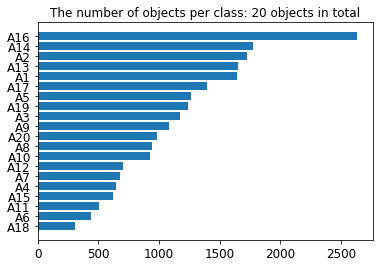

In [ ]:
from collections import Counter
class_obj = []
for ibbx in range(maxNobj):
    class_obj.extend(df_anno["bbx_{}_name".format(ibbx)].values)
class_obj = np.array(class_obj)

count             = Counter(class_obj[class_obj != 'nan'])
print(count)
class_nm          = list(count.keys())
class_count       = list(count.values())
asort_class_count = np.argsort(class_count)

class_nm          = np.array(class_nm)[asort_class_count]
class_count       = np.array(class_count)[asort_class_count]

xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm)
plt.title("The number of objects per class: {} objects in total".format(len(count)))
plt.show()



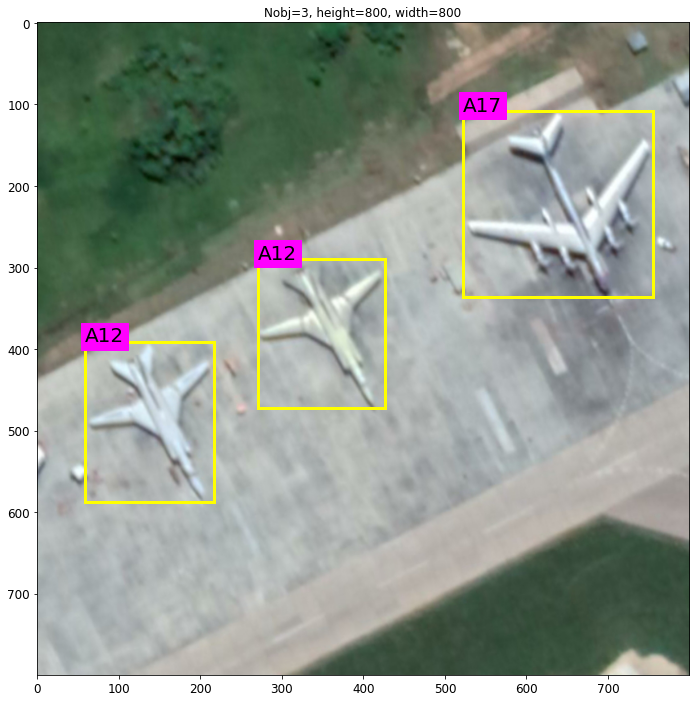

In [ ]:
import imageio
def plt_rectangle(plt,label,x1,y1,x2,y2):
    '''
    == Input ==
    
    plt   : matplotlib.pyplot object
    label : string containing the object class name
    x1    : top left corner x coordinate
    y1    : top left corner y coordinate
    x2    : bottom right corner x coordinate
    y2    : bottom right corner y coordinate
    '''
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
    
# randomly select 20 frames    
size = 20    
ind_random = np.random.randint(0,df_anno.shape[0],size=size)
for irow in ind_random:
    row  = df_anno.iloc[irow,:]
    path = os.path.join(img_dir, row["fileID"] + ".jpg")
    # read in image
    img  = imageio.imread(path)

    plt.figure(figsize=(12,12))
    plt.imshow(img) # plot image
    plt.title("Nobj={}, height={}, width={}".format(row["Nobj"],row["height"],row["width"]))
    # for each object in the image, plot the bounding box
    for iplot in range(row["Nobj"]):
        plt_rectangle(plt,
                      label = row["bbx_{}_name".format(iplot)],
                      x1=row["bbx_{}_xmin".format(iplot)],
                      y1=row["bbx_{}_ymin".format(iplot)],
                      x2=row["bbx_{}_xmax".format(iplot)],
                      y2=row["bbx_{}_ymax".format(iplot)])
    plt.show() ## show the plot

In [ ]:
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.misc
import skimage.segmentation
import skimage.feature
from copy import copy

## This must be the location of the PASCAL VOC data. 
img_dir          = "/content/military-aircraft-recognition-dataset/JPEGImages"


In [ ]:
import imageio

def image_segmentation(img_8bit, scale = 1.0, sigma = 0.8, min_size = 50):
    '''
    J.R.R. Uijlings's hierarchical grouping algorithm 
    
    == input ==
    img_8bit : shape = (height, width, 3),
               8-bits degital image (each digit ranges between 0 - 255)
    
    == output ==
    img      : shape = (height, width, 4)
    '''
    # convert the image to range between 0 and 1
    img_float = skimage.util.img_as_float(img_8bit)
    im_mask   = skimage.segmentation.felzenszwalb(
                    img_float, 
                    scale    = scale, 
                    sigma    = sigma,
                    min_size = min_size)
    img       = np.dstack([img_8bit,im_mask])
    return(img)

scale    = 1.0
sigma    = 0.8
# min_size may be around 50 for better RCNN performance but for the sake of visualization, I will stick to min_size =500
min_size = 500 # 500 3000

np.random.seed(4)
listed_path = os.listdir(img_dir)
Nplot = 5
random_img_path = np.random.choice(listed_path,Nplot)
for imgnm in random_img_path:
    # import 8 bits degital image (each digit ranges between 0 - 255)
    img_8bit  = imageio.imread(os.path.join(img_dir,imgnm))
    img       = image_segmentation(img_8bit, scale, sigma, min_size)
    
    fig = plt.figure(figsize=(15,30))
    ax  = fig.add_subplot(1,2,1)
    ax.imshow(img_8bit)
    ax.set_title("original image")
    ax  = fig.add_subplot(1,2,2)
    ax.imshow(img[:,:,3])
    ax.set_title("skimage.segmentation.felzenszwalb, N unique region = {}".format(len(np.unique(img[:,:,3]))))
    plt.show()

In [ ]:
def extract_region(img):
    '''
    For each segmented region,
    extract smallest rectangle regions covering the smallest segmented region.
    
    == input ==
    img : (height, width, N channel)
          N channel = [R, G, B , L], L = label for the region
          only the L channel is used in this analysis 
    == output ==
    
    dictionary R :
    
    {0: {'labels': [0], 'max_x': 131, 'max_y': 74, 'min_x': 0,   'min_y': 0},
     1: {'labels': [1], 'max_x': 189, 'max_y': 37, 'min_x': 75,  'min_y': 0},
     2: {'labels': [2], 'max_x': 282, 'max_y': 38, 'min_x': 162, 'min_y': 0},
     3: {'labels': [3], 'max_x': 499, 'max_y': 23, 'min_x': 247, 'min_y': 0},
     4: {'labels': [4], 'max_x': 499, 'max_y': 74, 'min_x': 428, 'min_y': 13},
     5: {'labels': [5], 'max_x': 441, 'max_y': 76, 'min_x': 333, 'min_y': 16},
     6: {'labels': [6], 'max_x': 348, 'max_y': 80, 'min_x': 62,  'min_y': 21},
    '''
    ## only use the segmentation output
    img_segment = img[:,:,3]
    R = {}
    for y, i in enumerate(img_segment): ## along vertical axis 

        for x, l in enumerate(i): ## along horizontal axis
            # initialize a new region
            if l not in R:
                R[l] = {"min_x": np.Inf, 
                        "min_y": np.Inf,
                        "max_x": 0, 
                        "max_y": 0, 
                        "labels": [l]}

            # bounding box
            if R[l]["min_x"] > x:
                R[l]["min_x"] = x
            if R[l]["min_y"] > y:
                R[l]["min_y"] = y
            if R[l]["max_x"] < x:
                R[l]["max_x"] = x
            if R[l]["max_y"] < y:
                R[l]["max_y"] = y
    ## remove region if it does not have positive height or positive width
    
    Rcopy = copy(R)
    for key in R.keys():
        r = R[key]
        if (r["min_x"] == r["max_x"]) or (r["min_y"] == r["max_y"]):
            del Rcopy[key]
    return(Rcopy)
R = extract_region(img)
print("{} rectangle regions are found".format(len(R)))


In [ ]:
def plt_rectangle(plt,label,x1,y1,x2,y2,color = "yellow", alpha=0.5):
    linewidth = 3
    if type(label) == list:
        linewidth = len(label)*3 + 2
        label = ""
        
    plt.text(x1,y1,label,fontsize=20,backgroundcolor=color,alpha=alpha)
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color, alpha=alpha)

figsize = (20,20)
plt.figure(figsize=figsize)    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

plt.figure(figsize=figsize)    
plt.imshow(img[:,:,3])
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

In [ ]:
def calc_texture_gradient(img):
    """
        calculate texture gradient for entire image

        The original SelectiveSearch algorithm proposed Gaussian derivative
        for 8 orientations, but we use LBP instead.

        output will be [height(*)][width(*)]
    """
    ret = np.zeros(img.shape[:3])
    for colour_channel in (0, 1, 2):
        ret[:, :, colour_channel] = skimage.feature.local_binary_pattern(
            img[:, :, colour_channel], 8, 1.0)

    return ret


def plot_image_with_min_max(img,nm):
    img = img[:,:,:3]
    plt.imshow(img)
    plt.title("{} min={:5.3f}, max={:5.3f}".format(nm,
                                                   np.min(img),
                                                   np.max(img)))
    plt.show()

tex_grad = calc_texture_gradient(img)   
plot_image_with_min_max(tex_grad,nm="tex_grad")

In [ ]:
def calc_hsv(img):
    hsv = skimage.color.rgb2hsv(img[:,:,:3])
    return(hsv)

hsv = calc_hsv(img)
plot_image_with_min_max(hsv,nm="hsv")


In [ ]:
def calc_hist(img, minhist=0, maxhist=1):
    """
        calculate colour histogram for each region

        the size of output histogram will be BINS * COLOUR_CHANNELS(3)

        number of bins is 25 as same as [uijlings_ijcv2013_draft.pdf]

        extract HSV
        
        len(hist) = BINS * 3
        hist[:BINS] = [0, 10, 20, 0,...,0] meaning that 
           there are 10 pixels that have values between (maxhist - minhist)/BINS*1 and (maxhist - minhist)/BINS*2
           there are 10 pixels that have values between (maxhist - minhist)/BINS*2 and (maxhist - minhist)/BINS*3
    
    """

    BINS = 25
    hist = np.array([])

    for colour_channel in range(3):

        # extracting one colour channel
        c = img[:, colour_channel]

        # calculate histogram for each colour and join to the result
        hist = np.concatenate(
            [hist] + [np.histogram(c, BINS, 
                                   # The lower and upper range of the bins. 
                                   (minhist, maxhist))[0]])

    # L1 normalize
    hist = hist / len(img)
    return hist

def augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_trad):
    for k, v in list(R.items()):

        ## height and width axies are flattened. 
        ## masked_pixel.shape = (N pixel with this mask ID , 3)
        masked_pixels  = hsv[img[:, :, 3] == k] 
        R[k]["size"]   = len(masked_pixels / 4)
        R[k]["hist_c"] = calc_hist(masked_pixels,minhist=0, maxhist=1)

        # texture histogram
        R[k]["hist_t"] = calc_hist(tex_grad[img[:, :, 3] == k],minhist=0, maxhist=2**8-1)
    return(R)
R = augment_regions_with_histogram_info(tex_grad, img,R,hsv,tex_grad)


In [ ]:


def extract_neighbours(regions):
    '''
    check if two regions intersect 
    '''

    def intersect(a, b):
        if (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]):
            return True
        return False

    R = list(regions.items())
    neighbours = []
    for cur, a in enumerate(R[:-1]):
        for b in R[cur + 1:]:
            if intersect(a[1], b[1]):
                neighbours.append((a, b))

    return neighbours

neighbours = extract_neighbours(R)
print("Out of {} regions, we found {} intersecting pairs".format(len(R),len(neighbours)))



In [ ]:
def _sim_colour(r1, r2):
    """
        calculate the sum of histogram intersection of colour
    """
    return sum([min(a, b) for a, b in zip(r1["hist_c"], r2["hist_c"])])


def _sim_texture(r1, r2):
    """
        calculate the sum of histogram intersection of texture
    """
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])


def _sim_size(r1, r2, imsize):
    """
        calculate the size similarity over the image
    """
    return 1.0 - (r1["size"] + r2["size"]) / imsize


def _sim_fill(r1, r2, imsize):
    """
        calculate the fill similarity over the image
    """
    bbsize = (
        (max(r1["max_x"], r2["max_x"]) - min(r1["min_x"], r2["min_x"]))
        * (max(r1["max_y"], r2["max_y"]) - min(r1["min_y"], r2["min_y"]))
    )
    return 1.0 - (bbsize - r1["size"] - r2["size"]) / imsize
def calc_sim(r1, r2, imsize):
    return (_sim_colour(r1, r2)       +\
            _sim_texture(r1, r2)      +\
            _sim_size(r1, r2, imsize) +\
            _sim_fill(r1, r2, imsize))

def calculate_similarlity(img,neighbours,verbose=False):
    # calculate initial similarities
    imsize = img.shape[0] * img.shape[1]
    S = {}
    for (ai, ar), (bi, br) in neighbours:
        S[(ai, bi)] = calc_sim(ar, br, imsize)
        if verbose:
            print("S[({:2.0f}, {:2.0f})]={:3.2f}".format(ai,bi,S[(ai, bi)]))
    return(S)

print("S[(Pair of the intersecting regions)] = Similarity index")
S = calculate_similarlity(img,neighbours,verbose=True)

In [ ]:


def merge_regions(r1, r2):
    '''
    Suppose r1 and r2 look like: 
    
    (minx1, miny1)
          _____________________
          |                   |
          |     (minx2,maxy2) |
          |           ________|____ 
          |          |        |    |
          |          |        |    |
          |          |________|____|(maxx2, maxy2)
          |___________________|(maxx1, maxy1)
          
    Then for merged region,
    
    minx : minx1
    miny : miny1
    maxx : maxx2
    maxy : maxy1 
    size : the number of pixels in the two regions (intersection is counted twice?)
    
                         
    '''
    new_size = r1["size"] + r2["size"]
    rt = {
        "min_x": min(r1["min_x"], r2["min_x"]),
        "min_y": min(r1["min_y"], r2["min_y"]),
        "max_x": max(r1["max_x"], r2["max_x"]),
        "max_y": max(r1["max_y"], r2["max_y"]),
        "size": new_size,
        "hist_c": (r1["hist_c"] * r1["size"] + r2["hist_c"] * r2["size"]) / new_size,
        "hist_t": (r1["hist_t"] * r1["size"] + r2["hist_t"] * r2["size"]) / new_size,
        "labels": r1["labels"] + r2["labels"]
    }
    return rt

def merge_regions_in_order(S,R,imsize, verbose=False):
    '''
    == Input ==
    S : similarity dictionary
    
    R : dictionary of proposed regions
    
    == Output ==
    
    regions : list of regions
    
    '''
    # hierarchal search
    while S != {}:

        # Step 1: get highest similarity pair of regions from the similarlity dictionary
        i, j = sorted(S.items(), key=lambda i: i[1])[-1][0]

        # Step 2: marge the region pair and add to the region dictionary
        t = max(R.keys()) + 1.0
        R[t] = merge_regions(R[i], R[j])

        # Step 3: from the similarity dictionary, 
        #         remove all the pair of regions where one of the regions is selected in Step 1
        key_to_delete = []
        for k, v in list(S.items()):
            if (i in k) or (j in k):
                key_to_delete.append(k)
        for k in key_to_delete:
            del S[k]

        # Step 4: calculate similarity with new merged region and the regions and its intersecting region
        #         (intersecting region is the region that are to be deleted)
        for k in key_to_delete:
            if k != (i,j):
                if k[0] in (i, j):
                    n = k[1]
                else:
                    n = k[0]
                S[(t, n)] = calc_sim(R[t], R[n], imsize)
    if verbose:
        print("{} regions".format(len(R)))

    ## finally return list of region proposal
    regions = []
    for k, r in list(R.items()):
            regions.append({
                'rect': (
                    r['min_x'],              # min x
                    r['min_y'],              # min y
                    r['max_x'] - r['min_x'], # width 
                    r['max_y'] - r['min_y']),# height
                'size': r['size'],
                'labels': r['labels']
            })
    return(regions)



regions = merge_regions_in_order(S,R,img.shape[0]*img.shape[1],verbose=True)



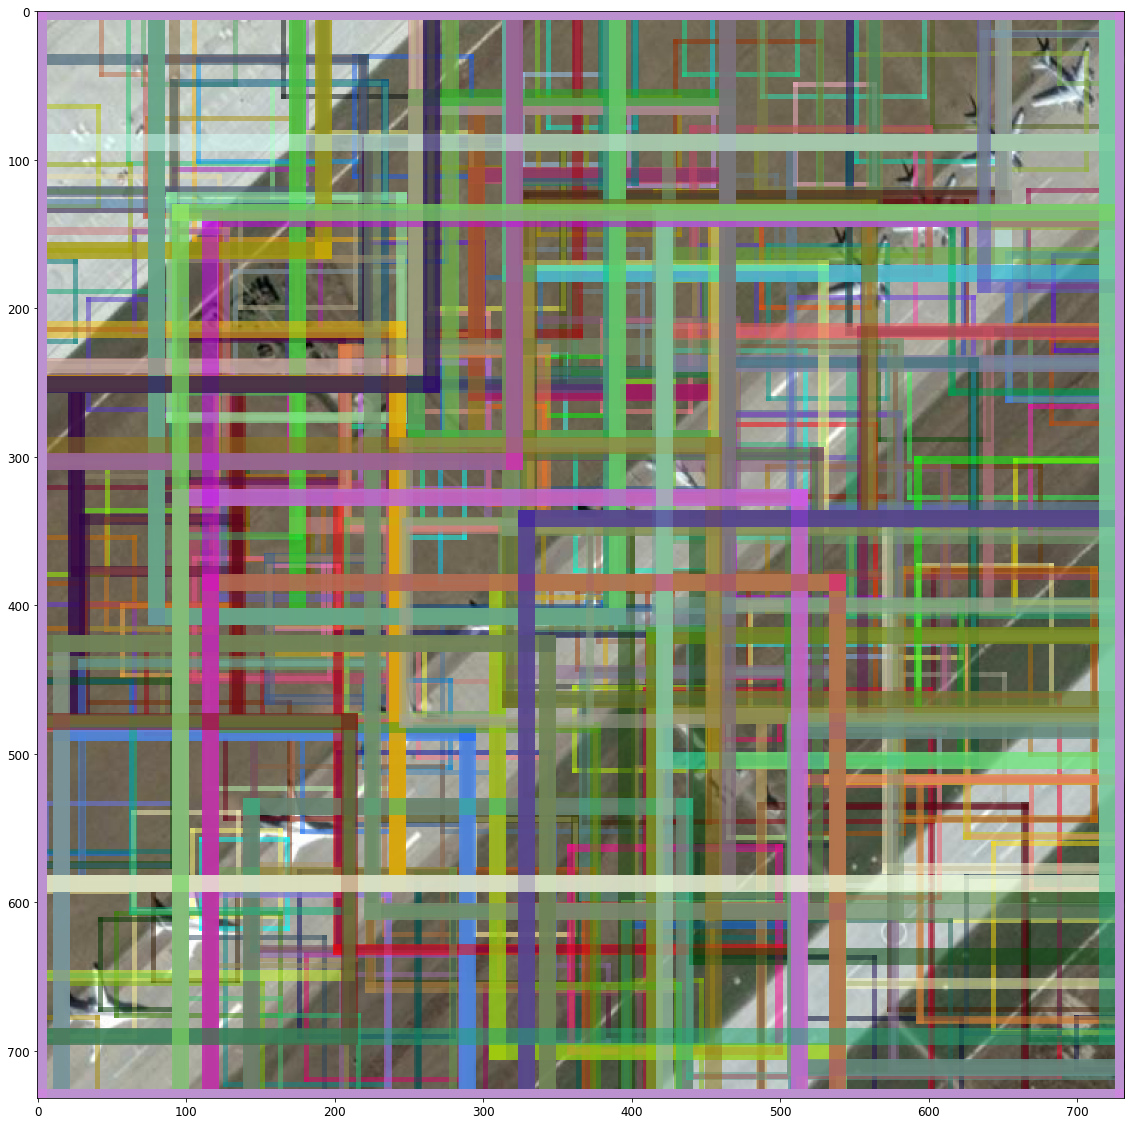

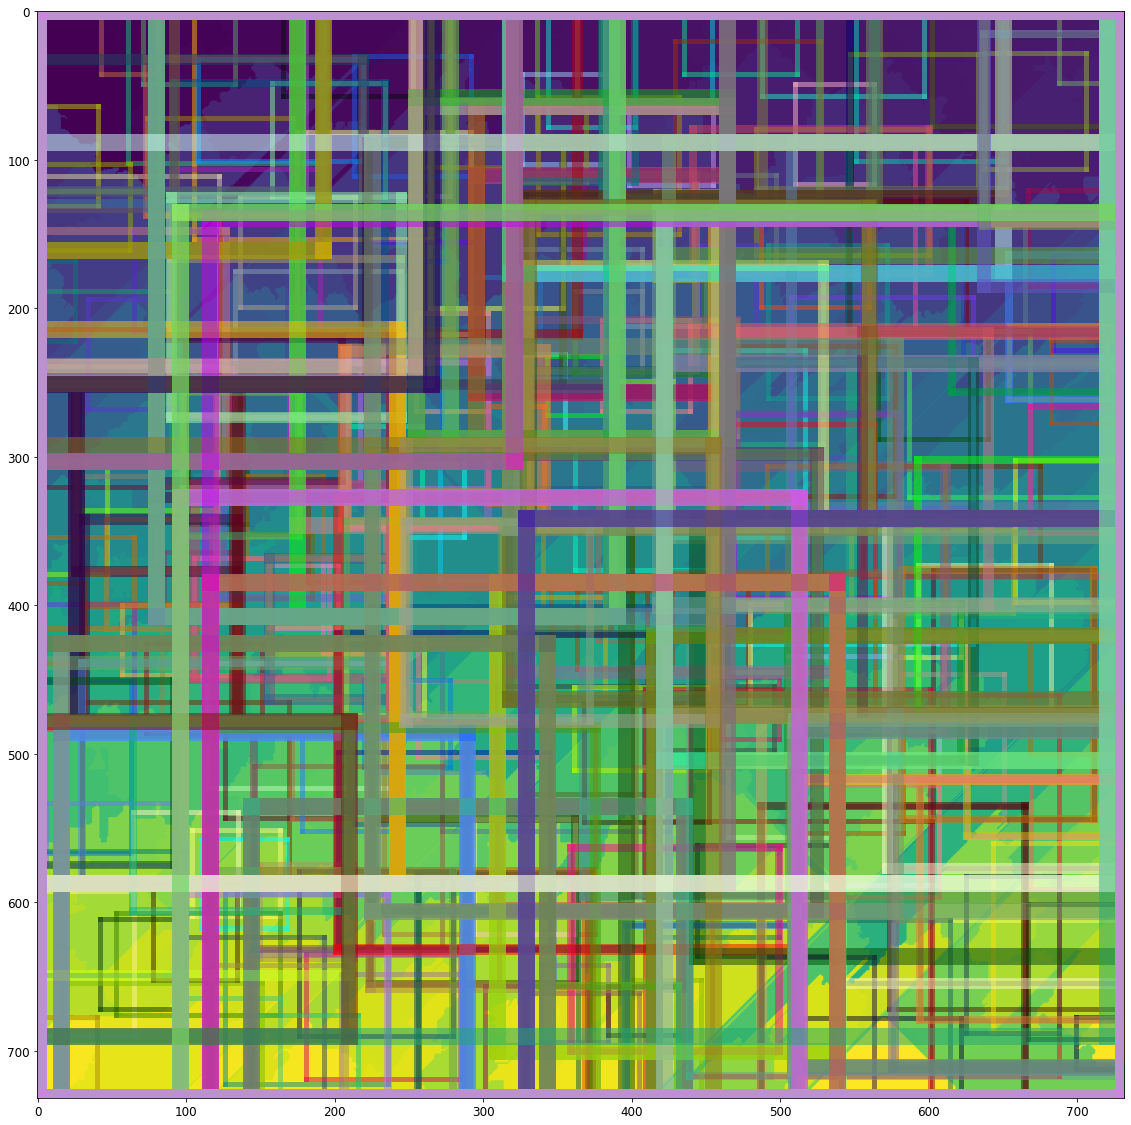

In [ ]:
plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,x1,y1,x2 = x1 + width,y2 = y1 + height, color = color)
plt.show()

plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,3])
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,
                  x1,
                  y1,
                  x2 = x1 + width,
                  y2 = y1 + height, color= color)
plt.show()


In [ ]:
def get_region_proposal(img_8bit,min_size = 500):
    img        = image_segmentation(img_8bit,min_size = min_size)
    R          = extract_region(img)    
    tex_grad   = calc_texture_gradient(img)
    hsv        = calc_hsv(img)
    R          = augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_grad)
    del tex_grad, hsv
    neighbours = extract_neighbours(R)
    S          = calculate_similarlity(img,neighbours)
    regions    = merge_regions_in_order(S,R,imsize = img.shape[0] * img.shape[1])
    return(regions)
regions = get_region_proposal(img_8bit,min_size=500)

regions
print("{} regions are found".format(len(regions)))

443 regions are found


In [ ]:
# location to save df_anno.csv
import pandas as pd
dir_preprocessed = "/content/military-aircraft-recognition-dataset"
df_anno = pd.read_csv(os.path.join(dir_preprocessed,"df_anno.csv"),low_memory=False)


In [ ]:
cols_bbx = []
for colnm in df_anno.columns:
    if "name" in colnm:
        cols_bbx.append(colnm)
bbx_has_personTF = df_anno[cols_bbx].values == "person"
pick = np.any(bbx_has_personTF,axis=1)
df_anno_person = df_anno.loc[pick,:]


In [ ]:
def get_IOU(xmin1,ymin1,xmax1,ymax1,
            xmin2,ymin2,xmax2,ymax2):
    '''
     
    (minx1, miny1)
          _____________________
          |                   |
          |     (minx2,maxy2) |
          |           ________|____ 
          |          |        |    |
          |          |        |    |
          |          |________|____|(maxx2, maxy2)
          |___________________|(maxx1, maxy1)
          
    
                         
    '''    
    def get_wha(xmin1,xmax1,ymin1,ymax1):
            width1  = xmax1 - xmin1
            height1 = ymax1 - ymin1
            area1   = width1 * height1
            return(width1,height1,area1)
    width1,height1,area1 = get_wha(xmin1,xmax1,ymin1,ymax1)
    width2,height2,area2 = get_wha(xmin2,xmax2,ymin2,ymax2)
            
    int_xmin   = np.max([xmin1,xmin2])
    int_ymin   = np.max([ymin1,ymin2])
    int_xmax   = np.min([xmax1,xmax2])
    int_ymax   = np.min([ymax1,ymax2])            
    int_width  = int_xmax - int_xmin
    int_height = int_ymax - int_ymin
    int_area   = int_width*int_height    
    
    if (int_width < 0) or (int_height < 0):
        IOU = 0
    else:
        IOU = int_area / float(area1 + area2 - int_area)
    return(IOU)

In [ ]:
import time, imageio
            
start = time.time()            
person_found_vec = []
for irow in range(df_anno_person.shape[0]): ## run over each frame
    row  = df_anno_person.iloc[irow,:]
    path = os.path.join(img_dir,row["fileID"] + ".jpg")
    img  = imageio.imread(path)
    
    ## calculate region proposal
    regions = get_region_proposal(img,min_size=40)
    
    for ibb in range(row["Nobj"]): ## go over each of the true annotated object
        print("frameID = {:04.0f}/{}, BBXID = {},  N region proposals = {}".format(
            irow, df_anno_person.shape[0], ibb, len(regions)))
        name = row["bbx_{}_name".format(ibb)]
        if name != "person":
            continue 
        ## bounding box of the person     
        true_xmin   = row["bbx_{}_xmin".format(ibb)]
        true_ymin   = row["bbx_{}_ymin".format(ibb)]
        true_xmax   = row["bbx_{}_xmax".format(ibb)]
        true_ymax   = row["bbx_{}_ymax".format(ibb)]   
        person_found_TF = 0
        for r in regions:  ## go over each region proposal and calculate the IoU
            
            prpl_xmin, prpl_ymin, prpl_width, prpl_height = r["rect"]
            IoU = get_IOU(prpl_xmin, prpl_ymin, prpl_xmin + prpl_width, prpl_ymin + prpl_height,
                          true_xmin, true_ymin, true_xmax, true_ymax)
            if IoU > 0.5:
                person_found_TF = 1
        person_found_vec.append(person_found_TF)
end = time.time()  
print("TIME TOOK : {}MIN".format((end-start)/60))
print("Total N of person : {}, Total N of person found : {}, TPR: {:4.3f}".format(
    len(person_found_vec),
    np.sum(person_found_vec),
    np.mean(person_found_vec)))

TIME TOOK : 1.993974049886068e-05MIN
Total N of person : 0, Total N of person found : 0.0, TPR:  nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print("Total N of person : {}, Total N of person found : {}, TPR: {:4.3f}".format(
    len(person_found_vec),
    np.sum(person_found_vec),
    np.mean(person_found_vec)))


Total N of person : 0, Total N of person found : 0.0, TPR:  nan


In [ ]:
import numpy as np
import pandas as pd
import os, sys 
import scipy.misc
import matplotlib.pyplot as plt
import random
import imageio
import skimage
print(sys.version)


3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
from keras.applications import VGG16
modelvgg16 = VGG16(include_top=True,weights='imagenet')
modelvgg16.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras import models
modelvgg = models.Model(inputs  =  modelvgg16.inputs, 
                        outputs = modelvgg16.layers[-3].output)
## show the deep learning model
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
! pip install selective-search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! git clone https://github.com/ChenjieXu/selective_search.git
! cd selective_search
! python setup.py install

Cloning into 'selective_search'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 168 (delta 4), reused 3 (delta 0), pack-reused 152
Receiving objects: 100% (168/168), 148.71 KiB | 14.87 MiB/s, done.
Resolving deltas: 100% (81/81), done.
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:


## the codes from Part 3 blog: https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_selective_search.html
import selective_search as ss

img_dir   = "/content/military-aircraft-recognition-dataset/JPEGImages"
imgnm     = "1.jpg"

# import 8 bits degital image (each digit ranges between 0 - 255)
img_8bit  = imageio.imread(os.path.join(img_dir,imgnm))
## region proposal codes 
#regions  = ss.get_region_proposal(img_8bit,min_size=50)
regions  = get_region_proposal(img_8bit,min_size=50)
print("{} candidate regions are proposed.".format(len(regions)))



7410 candidate regions are proposed.


1/1 [==============================] - 1s 699ms/step


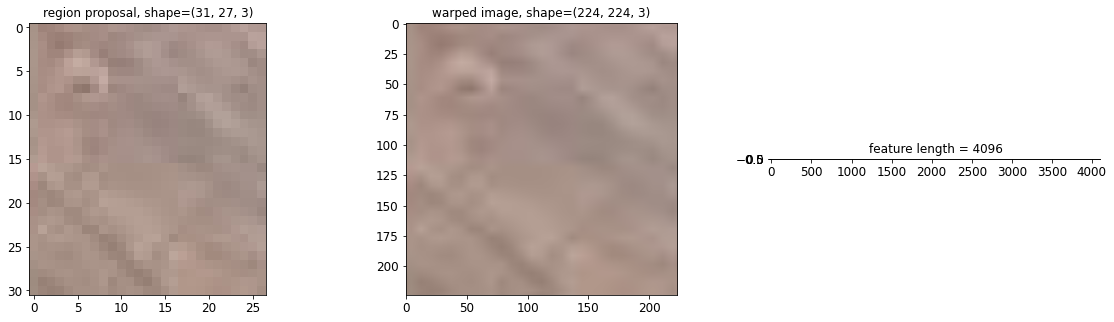

1/1 [==============================] - 0s 426ms/step


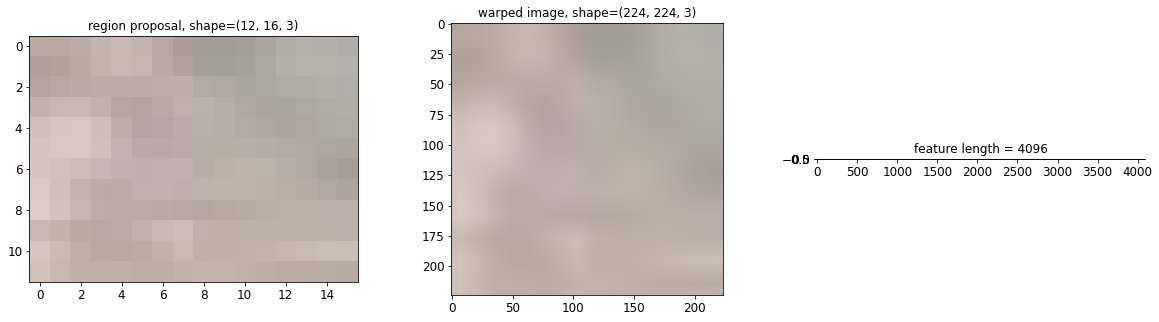

1/1 [==============================] - 0s 411ms/step


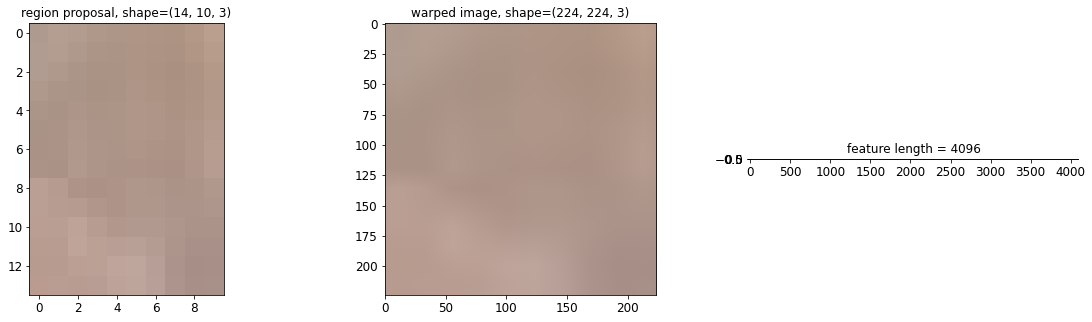

1/1 [==============================] - 0s 407ms/step


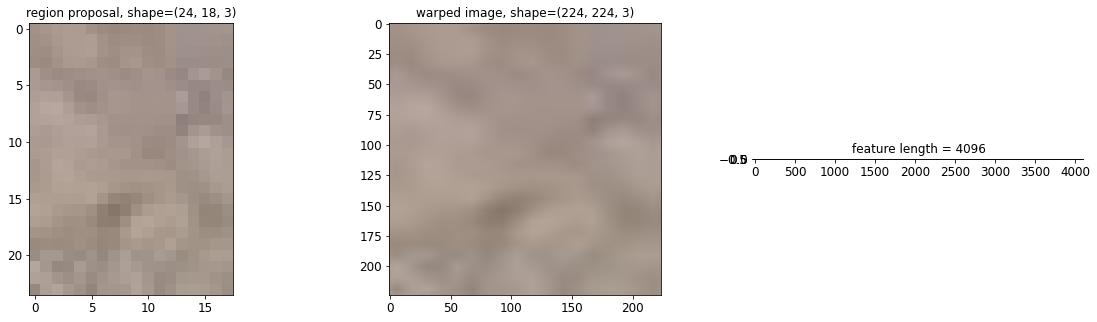

1/1 [==============================] - 0s 411ms/step


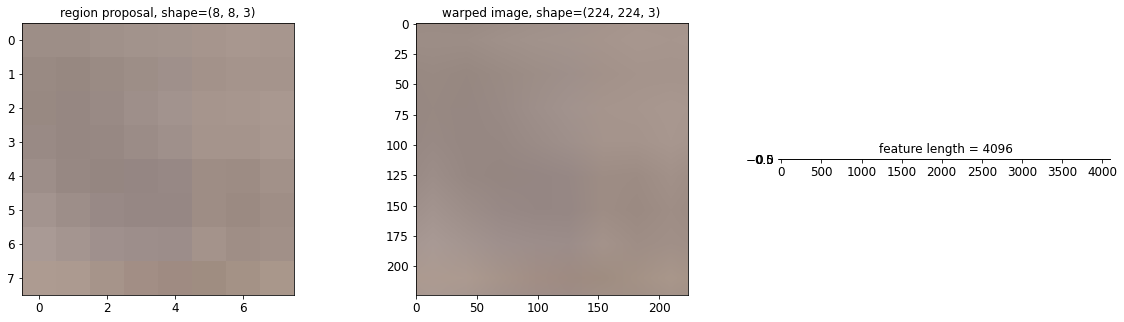

In [ ]:


def warp(img, newsize):
    '''
    warp image 
    
    
    img     : np.array of (height, width, Nchannel)
    newsize : (height, width)
    '''
    img_resize = skimage.transform.resize(img,newsize)
    return(img_resize)


warped_size = (224, 224)
X = []
for i in [1511,1654,1713,1692,1757]:
    r = regions[i]
    ## extract a single candidate region
    x , y , width, height = r["rect"]
    img_bb     = img_8bit[y:y + height,x:x + width]
    ## warp image
    img_warped = warp(img_bb, warped_size)
    ## create CNN feature
    feature = modelvgg.predict(img_warped.reshape(1,warped_size[0],warped_size[1],3))
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_bb)
    ax.set_title("region proposal, shape={}".format(img_bb.shape))
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(img_warped)
    ax.set_title("warped image, shape={}".format(img_warped.shape))

    ax = fig.add_subplot(1,3,3)    
    ax.imshow(feature, cmap='hot')
    ax.set_title("feature length = {}".format(len(feature.flatten())))
    plt.show()



In [ ]:


# location to save df_anno.csv
import pandas as pd
dir_preprocessed = "/content/military-aircraft-recognition-dataset"
df_anno = pd.read_csv(os.path.join(dir_preprocessed,"df_anno.csv"))

In [ ]:
cols_bbx = []
for colnm in df_anno.columns:
    if "name" in colnm:
        cols_bbx.append(colnm)
bbx_has_A1TF = df_anno[cols_bbx].values == "A1"
pick = np.any(bbx_has_A1TF,axis=1)
df_anno_A1 = df_anno.loc[pick,:]

In [ ]:
import pickle
IoU_cutoff_object     = 0.7
IoU_cutoff_not_object = 0.4
objnms = ["image0","info0","image1","info1"]  
dir_result = "result"

In [ ]:
import pickle
IoU_cutoff_object     = 0.7
IoU_cutoff_not_object = 0.4
objnms = ["image0","info0","image1","info1"]  
dir_result = "result"

import time 
start = time.time()   
# the "rough" ratio between the region candidate with and without objects.
N_img_without_obj = 2 
newsize = (300,400) ## hack
image0, image1, info0,info1 = [], [], [], [] 
for irow in range(df_anno_A1.shape[0]):
    ## extract a single frame that contains at least one person object
    row  = df_anno_A1.iloc[irow,:]
    ## read in the corresponding frame
    path = os.path.join(img_dir,row["fileID"] + ".jpg")
    img  = imageio.imread(path)
    orig_h, orig_w, _ = img.shape
    ## to reduce the computation speed,
    ## I will do a small hack here. I will resize all the images into newsize = (200,250)    
    img  = warp(img, newsize)
    orig_nh, orig_nw, _ = img.shape
    ## region candidates for this frame
    regions = ss.get_region_proposal(img,min_size=50)[::-1]
    
    ## for each object that exists in the data,
    ## find if the candidate regions contain the person
    for ibb in range(row["Nobj"]): 

        name = row["bbx_{}_name".format(ibb)]
        if name != "person": ## if this object is not person, move on to the next object
            continue 
        if irow % 50 == 0:
            print("frameID = {:04.0f}/{}, BBXID = {:02.0f},  N region proposals = {}, N regions with an object gathered till now = {}".format(
                    irow, df_anno_person.shape[0], ibb, len(regions), len(image1)))
        
        ## extract the bounding box of the person object  
        multx, multy  = orig_nw/orig_w, orig_nh/orig_h 
        true_xmin     = row["bbx_{}_xmin".format(ibb)]*multx
        true_ymin     = row["bbx_{}_ymin".format(ibb)]*multy
        true_xmax     = row["bbx_{}_xmax".format(ibb)]*multx
        true_ymax     = row["bbx_{}_ymax".format(ibb)]*multy
        
        
        person_found_TF = 0
        _image1 = None
        _image0, _info0  = [],[]
        ## for each candidate region, find if this person object is included
        for r in regions:
            
            prpl_xmin, prpl_ymin, prpl_width, prpl_height = r["rect"]
            ## calculate IoU between the candidate region and the object
            IoU = ss.get_IOU(prpl_xmin, prpl_ymin, prpl_xmin + prpl_width, prpl_ymin + prpl_height,
                             true_xmin, true_ymin, true_xmax, true_ymax)
            ## candidate region numpy array
            img_bb = np.array(img[prpl_ymin:prpl_ymin + prpl_height,
                                  prpl_xmin:prpl_xmin + prpl_width])
            
            info = [irow, prpl_xmin, prpl_ymin, prpl_width, prpl_height]
            if IoU > IoU_cutoff_object:
                _image1 = img_bb
                _info1  = info
                break
            elif IoU < IoU_cutoff_not_object:
                _image0.append(img_bb) 
                _info0.append(info) 
        if _image1 is not None:
            # record all the regions with the objects
            image1.append(_image1)
            info1.append(_info1)
            if len(_info0) >= N_img_without_obj: ## record only 2 regions without objects
                # downsample the candidate regions without object 
                # so that the training does not have too much class imbalance. 
                # randomly select N_img_without_obj many frames out of all the sampled images without objects.
                pick = np.random.choice(np.arange(len(_info0)),N_img_without_obj)
                image0.extend([_image0[i] for i in pick ])    
                info0.extend( [_info0[i]  for i in pick ])  

        
end = time.time()  
print("TIME TOOK : {}MIN".format((end-start)/60))

### Save image0, info0, image1, info1 
objs   = [image0,info0,image1,info1]        
for obj, nm in zip(objs,objnms):
    with open(os.path.join(dir_result ,'{}.pickle'.format(nm)), 'wb') as handle:
        pickle.dump(obj, 
                    handle, protocol=pickle.HIGHEST_PROTOCOL)



UFuncTypeError: ignored

In [ ]:
#!pip install --upgrade pip

In [ ]:
#!pip install keras-cv

In [ ]:
#!pip install luketils==0.1.3 

In [ ]:
#Begining of ALL KERAS Model
#import tensorflow as tf
#import tensorflow_datasets as tfds
#from tensorflow import keras
#from tensorflow.keras import optimizers

#import keras_cv
#from keras_cv import bounding_box
#import os
#from luketils import visualization

#BATCH_SIZE = 16
#EPOCHS = int(os.getenv("EPOCHS", "1"))
#CHECKPOINT_PATH = os.getenv("CHECKPOINT_PATH", "checkpoint/")
#INFERENCE_CHECKPOINT_PATH = os.getenv("INFERENCE_CHECKPOINT_PATH", CHECKPOINT_PATH)


In [ ]:
train_ds, ds_info = keras_cv.datasets.pascal_voc.load(
    split='train', bounding_box_format='xywh', batch_size=8
)

In [ ]:
class_nm

In [ ]:
dataset, dataset_info = keras_cv.datasets.pascal_voc.load(
    split="train", bounding_box_format="xywh", batch_size=BATCH_SIZE
)

class_ids = [
    "A18",
    "A6",
    "A11",
    "A15",
    "A4",
    "A7",
    "A12",
    "A10",
    "A8",
    "A20",
    "A9",
    "A3",
    "A19",
    "A5",
    "A17",
    "A1",
    "A13",
    "A2",
    "A14",
    "A16",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

def visualize_dataset(dataset, bounding_box_format):
    example = next(iter(dataset))
    images, boxes = example["images"], example["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=boxes,
        scale=4,
        rows=3,
        cols=3,
        show=True,
        thickness=4,
        font_scale=1,
        class_mapping=class_mapping,
    )


visualize_dataset(dataset, bounding_box_format="xywh")

Nicholas